<a href="https://colab.research.google.com/github/JonasSouza871/Estatistica_python/blob/main/Testes_de_Hip%C3%B3teses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Teste de normalidade e as etapas de um teste

--------------

## 1.1. Ambiente e conhecendo os dataset

------------------------

-  Inclusão das bibliotes necessárias.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm #modelagem estatística e econométrica. Ela fornece ferramentas
#para realizar regressões (lineares, logísticas, etc.),
#testes estatísticos, análise de séries temporais
# é mais avançada que o scipy.stats

In [2]:
#Mesmo dataset dos outros cursos
df = pd.read_csv('dados.csv')
df.head(10)
# uf, sexo, idade, cor , anos de estudo, renda e altura.

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
5,11,1,34,8,12,790,1.637906
6,11,0,57,8,12,3150,1.570078
7,11,1,60,8,12,1700,1.608495
8,11,1,50,4,14,1800,1.780329
9,11,0,26,8,12,1150,1.793203


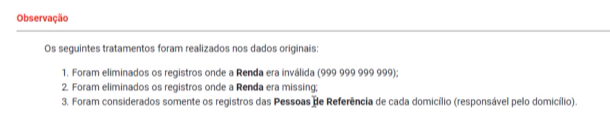

## 1.2. Testes de normalidade
-------------------------------

- Para saber se cada variavel possuem uma distribuição normal ou não.

In [4]:
#Função para isso:
from scipy.stats import normaltest

<Axes: >

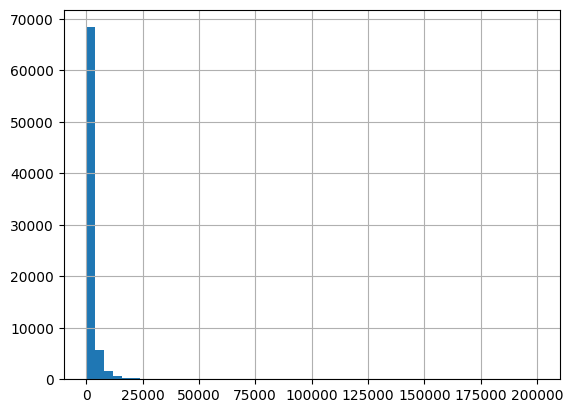

In [14]:
# teste para renda
df.Renda.hist(bins=50)

-  Visualmente vemos que não se parece muito com uma distribuição normal

- Para fazer o teste:

In [15]:
significancia = 0.05 #significancia de 5%
teste_hipotese_normal = normaltest(df.Renda)
print(teste_hipotese_normal)

NormaltestResult(statistic=np.float64(152380.75803960307), pvalue=np.float64(0.0))


In [16]:
start_valor, p_valor = teste_hipotese_normal = normaltest(df.Renda)
# se p_valor for menor que a significancia é descartada a hipotese de distribuição normal
p_valor < significancia


np.True_

- Como é verdade, logo descartamos renda como distribuição normal.

- Para altura agora mantendo a mesma significancia

<Axes: >

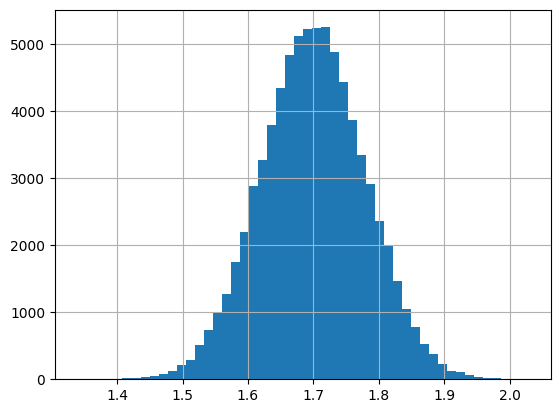

In [17]:
df.Altura.hist(bins=50)

- O grafico se asemelha muito a uma distribuição normal.

In [19]:
start_valor, p_valor = normaltest(df.Altura)
print(p_valor)
p_valor < significancia

0.9049591541967501


np.False_

- Falso, logo a hipostese é verdadeira, e se trata sim de uma distribuição NORMAL.

## 1.3. Etapas básicas de um teste:
-----------

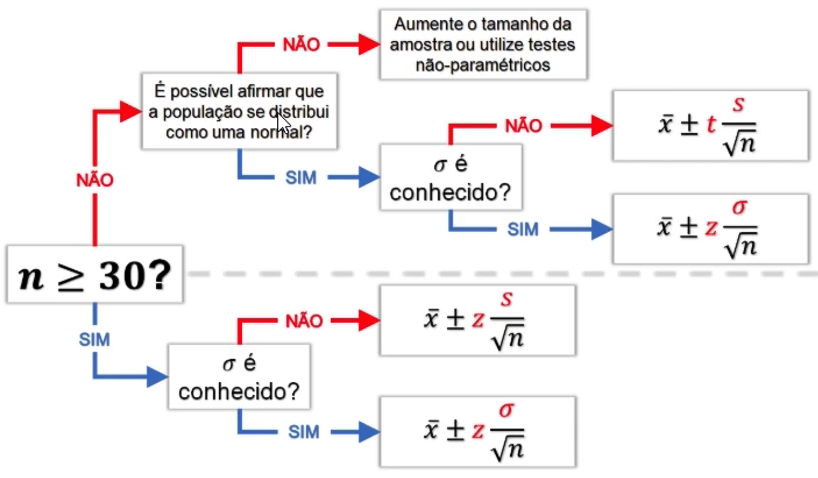

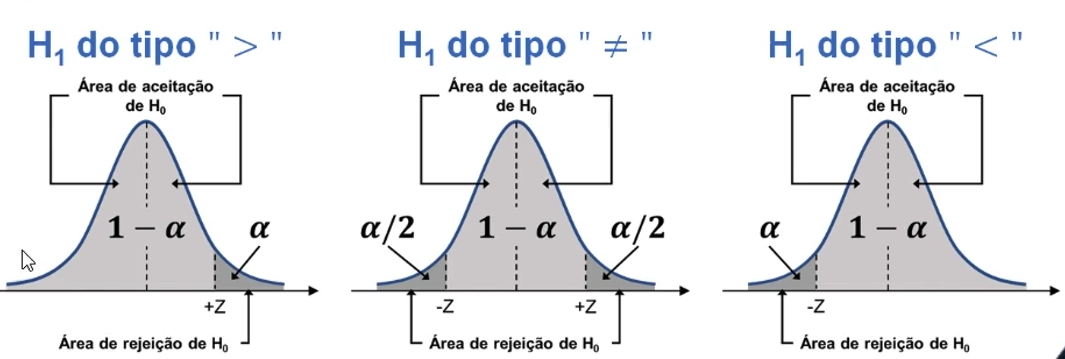

# 2. Teste bicaudal e entendendo p_valor

---------------------

## 2.1. Teste bicaudal

--------------

In [20]:
amostra = [509, 505, 495, 510, 496, 509, 497, 502, 503, 505,
           501, 505, 510, 505, 504, 497, 506, 506, 508, 505,
           497, 504, 500, 498, 506, 496, 508, 497, 503, 501,
           503, 506, 499, 498, 509, 507, 503, 499, 509, 495,
           502, 505, 504, 509, 508, 501, 505, 497, 508, 507]

In [22]:
# criando o dataframe para amostra
import pandas as pd
df_amostra = pd.DataFrame(amostra, columns=['amostra'])
df_amostra.head(10)

,amostra
0,509
1,505
2,495
3,510
4,496
5,509
6,497
7,502
8,503
9,505


In [25]:
media_amostra = df_amostra.mean() #media das amostras igual ao valor dado na questao
print(media_amostra)

amostra    503.24
dtype: float64


In [26]:
#para achar o desvio padrao da amostra
desvio_padrao_amostra = df_amostra.std()
print(desvio_padrao_amostra)

amostra    4.483803
dtype: float64


In [27]:
# valores achado e dados na questao
media  = 500
significancia = 0.05
confianca = 1 - significancia
n = 50 #numero de amostras

In [29]:
#achar o Z agora
from scipy.stats import norm
Probabilizade_z = confianca + (significancia/2)
print(Probabilizade_z)
z = norm.ppf(0.975)
print(z)

0.975
1.959963984540054


- Achar a area de rejeição

In [ ]:
# z_rej = ( media_amostra - mediia ) /(desvio_padrao_amostra/ sqrt(n))
media_amostral = 503.24 #calculado acima

